In [103]:
# import required libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [104]:
# load the csv into a dataframe
lending_df = pd.read_csv('loan.csv')

In [105]:
# check the shape of the dataframe
lending_df.shape

(39717, 111)

In [106]:
# display information about the dataframe
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [107]:
# let's see which columns have null values and how much
null_columns = lending_df.isnull().sum()[lending_df.isnull().sum() > 0]
list(zip(null_columns.index, null_columns))

[('emp_title', 2459),
 ('emp_length', 1075),
 ('desc', 12942),
 ('title', 11),
 ('mths_since_last_delinq', 25682),
 ('mths_since_last_record', 36931),
 ('revol_util', 50),
 ('last_pymnt_d', 71),
 ('next_pymnt_d', 38577),
 ('last_credit_pull_d', 2),
 ('collections_12_mths_ex_med', 56),
 ('mths_since_last_major_derog', 39717),
 ('annual_inc_joint', 39717),
 ('dti_joint', 39717),
 ('verification_status_joint', 39717),
 ('tot_coll_amt', 39717),
 ('tot_cur_bal', 39717),
 ('open_acc_6m', 39717),
 ('open_il_6m', 39717),
 ('open_il_12m', 39717),
 ('open_il_24m', 39717),
 ('mths_since_rcnt_il', 39717),
 ('total_bal_il', 39717),
 ('il_util', 39717),
 ('open_rv_12m', 39717),
 ('open_rv_24m', 39717),
 ('max_bal_bc', 39717),
 ('all_util', 39717),
 ('total_rev_hi_lim', 39717),
 ('inq_fi', 39717),
 ('total_cu_tl', 39717),
 ('inq_last_12m', 39717),
 ('acc_open_past_24mths', 39717),
 ('avg_cur_bal', 39717),
 ('bc_open_to_buy', 39717),
 ('bc_util', 39717),
 ('chargeoff_within_12_mths', 56),
 ('mo_sin_ol

In [108]:
# remove all columns that doesn't have any data at all
lending_df = lending_df.dropna(axis=1, how='all')

In [109]:
# check the dataframe again for null values
null_columns = lending_df.isnull().sum()[lending_df.isnull().sum() > 0]
list(zip(null_columns.index, null_columns))

[('emp_title', 2459),
 ('emp_length', 1075),
 ('desc', 12942),
 ('title', 11),
 ('mths_since_last_delinq', 25682),
 ('mths_since_last_record', 36931),
 ('revol_util', 50),
 ('last_pymnt_d', 71),
 ('next_pymnt_d', 38577),
 ('last_credit_pull_d', 2),
 ('collections_12_mths_ex_med', 56),
 ('chargeoff_within_12_mths', 56),
 ('pub_rec_bankruptcies', 697),
 ('tax_liens', 39)]

In [110]:
# drop few other columns that have significant missing values or are irrelevant
columns_to_drop = ['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc']
lending_df.drop(columns = columns_to_drop, inplace=True)
lending_df.shape

(39717, 53)

In [111]:
# check the dataframe again for null values
null_columns = lending_df.isnull().sum()[lending_df.isnull().sum() > 0]
list(zip(null_columns.index, null_columns))

[('emp_title', 2459),
 ('emp_length', 1075),
 ('title', 11),
 ('revol_util', 50),
 ('last_pymnt_d', 71),
 ('last_credit_pull_d', 2),
 ('collections_12_mths_ex_med', 56),
 ('chargeoff_within_12_mths', 56),
 ('pub_rec_bankruptcies', 697),
 ('tax_liens', 39)]

In [112]:
# inspect employee title
# number of employers / employee title
print(len(lending_df['emp_title'].unique()))

# count of employee titles
lending_df['emp_title'].value_counts()

28821


emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [113]:
# remove employee title column as it has lot of missing values and doesn't think it would impact the analysis as much considering there are
# 28K unique employee titles and the individual counts are not that high
lending_df.drop(columns=['emp_title'], inplace=True)

In [114]:
# we have emp_length with 1000 plus missing values. First clean employee length before taking a call on what to do
lending_df['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [115]:
# Just get the numericals from the emp_length data (less than 1 is considered one and above 10 is considered 10)
lending_df['emp_length'] = lending_df['emp_length'].apply(lambda x: str(x).replace('years', '').replace('year', '').replace('<','').replace('+',''))

In [116]:
# analyse the values and it's distribution
lending_df['emp_length'][lending_df['emp_length'] != 'nan'].apply(lambda x: int(x)).value_counts()

emp_length
10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [117]:
# Try to impute values for employee length based on the distribution so that it doesn't skew the analysis
# set 'nan' string to actual nulls
lending_df['emp_length'] = lending_df['emp_length'].replace('nan', np.nan)

# get distribution of non null values
dbn = lending_df['emp_length'].dropna().apply(lambda x: int(x)).value_counts(normalize=True)

#missing values
mval = lending_df['emp_length'].isnull()
num_mval = mval.sum()

# values to impute
impute_val = lending_df['emp_length'].median()

# finally fill nan with
lending_df.loc[mval, 'emp_length'] = impute_val

In [118]:
# convert everything to integer
lending_df['emp_length'] = lending_df['emp_length'].apply(lambda x: int(x))

In [119]:
# check again
lending_df['emp_length'].value_counts()

emp_length
10    8879
1     7823
4     4511
2     4388
3     4095
5     3282
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

In [120]:
# check dataframe again for null values
null_columns = lending_df.isnull().sum()[lending_df.isnull().sum() > 0]
list(zip(null_columns.index, null_columns))

[('title', 11),
 ('revol_util', 50),
 ('last_pymnt_d', 71),
 ('last_credit_pull_d', 2),
 ('collections_12_mths_ex_med', 56),
 ('chargeoff_within_12_mths', 56),
 ('pub_rec_bankruptcies', 697),
 ('tax_liens', 39)]

In [121]:
# checking data type of variables
lending_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                      int64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc    

In [122]:
# replacing na values of remaining columns using median and mode
# filling na of title column
lending_df['title'].fillna(lending_df['title'].mode()[0], inplace = True)

# filling na of revol_util column
lending_df['revol_util'].fillna(lending_df['revol_util'].mode()[0], inplace = True)

# filling na of last_pymnt_d column
lending_df['last_pymnt_d'].fillna(lending_df['last_pymnt_d'].mode()[0], inplace = True)

# filling na of last_credit_pull_d column
lending_df['last_credit_pull_d'].fillna(lending_df['last_credit_pull_d'].mode()[0], inplace = True)

# filling na of collections_12_mths_ex_med column
lending_df['collections_12_mths_ex_med'].fillna(lending_df['collections_12_mths_ex_med'].median(), inplace = True)

# filling na of chargeoff_within_12_mths column
lending_df['chargeoff_within_12_mths'].fillna(lending_df['chargeoff_within_12_mths'].median(), inplace = True)

# filling na of pub_rec_bankruptcies column
lending_df['pub_rec_bankruptcies'].fillna(lending_df['pub_rec_bankruptcies'].median(), inplace = True)

# filling na of tax_liens column
lending_df['tax_liens'].fillna(lending_df['tax_liens'].median(), inplace = True)

In [123]:
# check dataframe again for null values
null_columns = lending_df.isnull().sum()[lending_df.isnull().sum() > 0]
list(zip(null_columns.index, null_columns))

[]

In [124]:
# checking unique values in each columns
lending_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       10
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                     

In [125]:
# drop few columns that have  a single value or not helping in analysis
columns_to_drop=['pymnt_plan','url','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq',
                 'chargeoff_within_12_mths','delinq_amnt','tax_liens']
lending_df.drop(columns=columns_to_drop, inplace=True)

In [126]:
# checking dataframe info
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               39717 non-null  int64  
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [127]:
# remove '%' symbol from int_rate and converting to float
lending_df['int_rate'] = lending_df['int_rate'].apply(lambda x: str(x).replace('%', ''))
lending_df['int_rate'] = lending_df['int_rate'].apply(lambda x: float(x))

In [128]:
# extract first three numerical number from zip code
lending_df['zip_code'] = lending_df['zip_code'].apply(lambda x:str(x)[:3])
lending_df['zip_code'] = lending_df['zip_code'].apply(lambda x: int(x))

In [129]:
#add a new column earliest_cr_year by extracting year part from earliest_cr_line
lending_df['earliest_cr_year']=lending_df['earliest_cr_line'].apply(lambda x : '20'+x[-2:] if int(x[-2:]) <10 else '19'+x[-2:])
lending_df['earliest_cr_year'] = lending_df['earliest_cr_year'].apply(lambda x: int(x))

In [130]:
#remove '%' symbol from revol_util and converting to float
lending_df['revol_util'] = lending_df['revol_util'].apply(lambda x: str(x).replace('%', ''))
lending_df['revol_util'] = lending_df['revol_util'].apply(lambda x: float(x))

In [131]:
# significant columns for analysis
num_cols=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','zip_code','dti','delinq_2yrs','inq_last_6mths',
          'open_acc','pub_rec','revol_bal','revol_util','total_acc','pub_rec_bankruptcies','earliest_cr_year']
cat_cols=['term','grade','sub_grade','emp_length','home_ownership','verification_status','issue_d','loan_status','purpose','addr_state',
          'last_credit_pull_d']
extra_cols=['id','member_id','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
            'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','title','earliest_cr_line']

In [132]:
# Remove outliers from some columns
# pub_rec_bankruptcies
lending_df.drop(lending_df[lending_df['pub_rec_bankruptcies'] >1].index, inplace=True)

# open_acc
lending_df.drop(lending_df[lending_df['open_acc'] > 30].index, inplace=True)

# total_acc
lending_df.drop(lending_df[lending_df['total_acc'] >60].index, inplace=True)

# pub_rec
lending_df.drop(lending_df[lending_df['pub_rec'] >1].index, inplace=True)

# delinq_2yrs
lending_df.drop(lending_df[lending_df['delinq_2yrs'] >6].index, inplace=True)

# earliest_cr_year
lending_df.drop(lending_df[lending_df['earliest_cr_year'] <1970].index, inplace=True)



# will keep the rest of the data as is

In [133]:
# univariate analysis
lending_df['loan_amnt'].value_counts()

loan_amnt
10000    2812
12000    2310
5000     2032
6000     1883
15000    1870
         ... 
8175        1
19475       1
21225       1
17225       1
22550       1
Name: count, Length: 883, dtype: int64

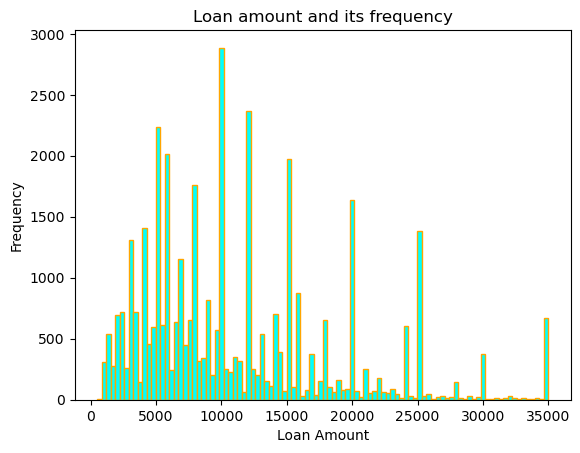

In [134]:
# looking at loan amount
plt.hist(lending_df['loan_amnt'], bins=100, edgecolor='Orange',color='cyan')
plt.title('Loan amount and its frequency')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

### Insights

1) Most commonly people apply for 10000 USD  
2) The amounts in between (that is not an increment of 5k) seem to be very less frequent and become rare as the amount increases (see there are close to 400 applications for a loan amount of 30,000 whereas virtually nothing till 35000 which has more than 500 applicants)

This should be because they round up the required amount and then apply for a loan and 10,000 seems to be the amount that most of the requirements fall in.

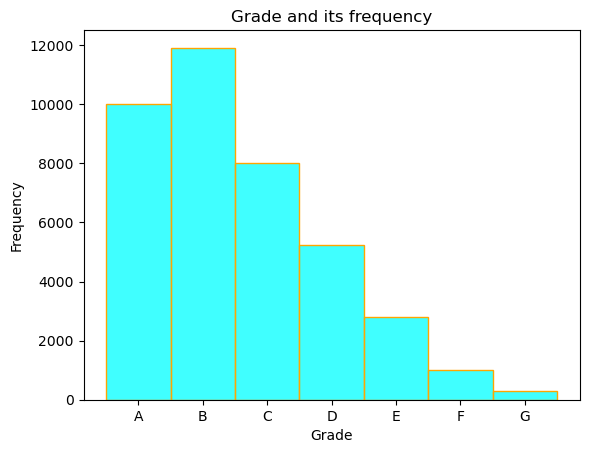

In [135]:
# looking at Grade
sns.histplot(lending_df['grade'].sort_values(), bins = 20, edgecolor='Orange',color='cyan')
plt.title('Grade and its frequency')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

### Insights
Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, the quality of the collateral, and the likelihood of repayment of the principal and interest.

1) There are 7 grades for loans
2) Grades A, B, and C are more common with being the most common.  
3) Very few loans are in D, E, F, and G grades, and declining numbers from D to G with G being the lowest

The reason for Grades A, B, and C to be more common could be because the lending agency doesn't want to take risks. Interestingly most loans are graded B and not A.

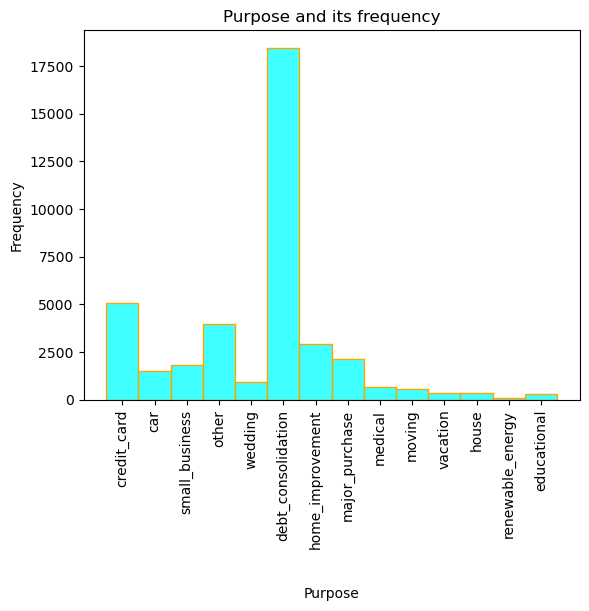

In [136]:
# purpose
sns.histplot(lending_df['purpose'], bins = 20, edgecolor='Orange',color='cyan')
plt.title('Purpose and its frequency')
plt.xlabel('\n\nPurpose')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

### Insights

1) Most loans are applied for debt consolidation, more than 45 percent of total loans. Debt consolidation means that a person tries to consolidate all his debts into a single debt.  
2) The second most common reason for loan application is to pay off credit card bills.  
3) Very few people take loans for houses, cars, or educational purposes which is an interesting insight since this is what we think of common reasons for applying for loans.

Debt consolidation is the primary reason for people to apply for loans which is interesting since milestone vents like house
car etc are way below as a reason to take a loan.

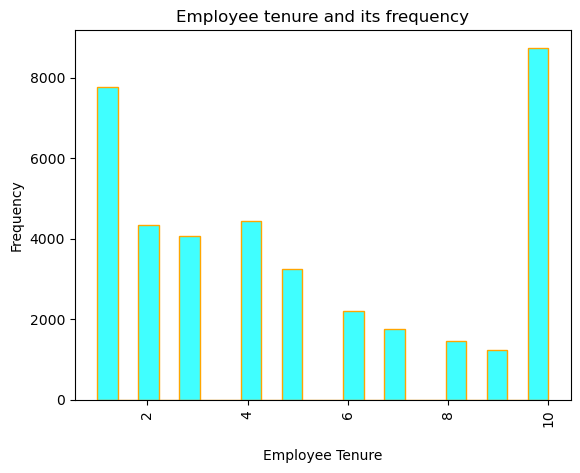

In [137]:
# employee tenure
sns.histplot(lending_df['emp_length'], edgecolor='Orange',color='cyan')
plt.title('Employee tenure and its frequency')
plt.xlabel('\nEmployee Tenure')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

### Insights
1) Employees with 10-plus years of tenure or within their 1st year tend to apply for loans the most  
2) Employees with tenure between 2 and 9 years have a declining trend in application of loan from 2 to 9  

The increase in loan application at 1st year or 10 plus years may indicate milestone life events for which the loan was applied.

In [33]:
# starting multivariate analysis focusing on how specific data points impact loan default

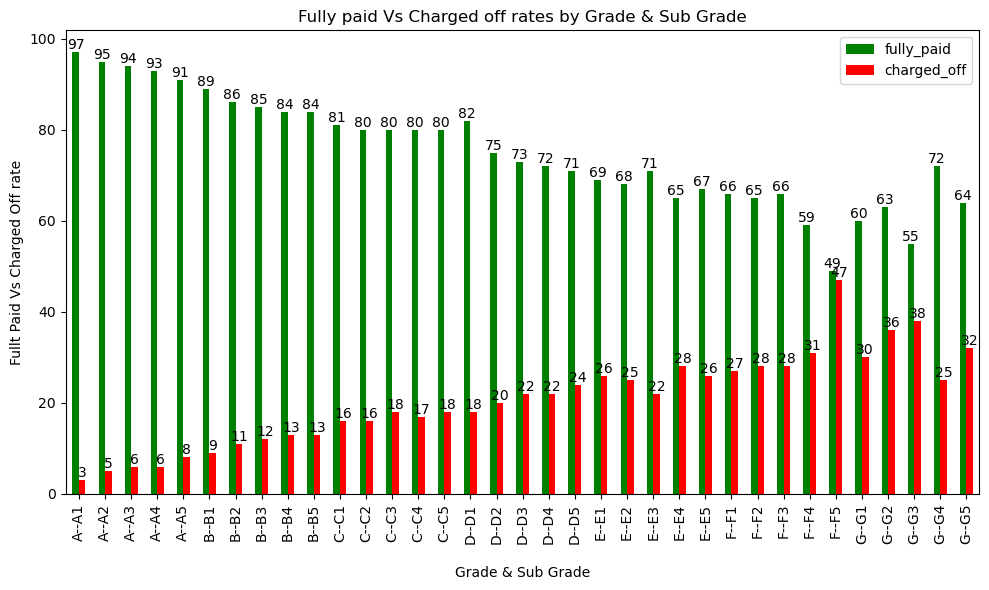

In [138]:
# charge_off and fully_paid rates by grade and subgrade
grade_df = lending_df[['grade', 'sub_grade']]
grade_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
grade_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = grade_df.groupby(['grade', 'sub_grade'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt.plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nGrade & Sub Grade')
plt.ylabel('Fullt Paid Vs Charged Off rate')
plt.title('Fully paid Vs Charged off rates by Grade & Sub Grade')
plt.xticks(charge_paid_rt.index, charge_paid_rt['grade'] + '--' + charge_paid_rt['sub_grade'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by Grade and Sub Grade
1) Loans are graded from A to G based on risk analysis, A being the lowest risk and G being the highest  
2) Within the grades there are sub-grades again from 1 to 5. For example A1 - A5 where A1 is with lowest risk whereas A5 has the highest  
3) As expected from the data we have, Loans graded A and subgrade A1 have the lowest default/charge-off rates  
4) The tendency in general is that the lower the grade-subgrade combination the higher the default rate. For example, A-A1 (higher grade) has a lower default rate than B-B1(lower grade)  
5) However the highest default rate is among F-F5 close to 45 percent default rate which is very high.



#### Significant Indicator :  <font color='green'>Yes</font>

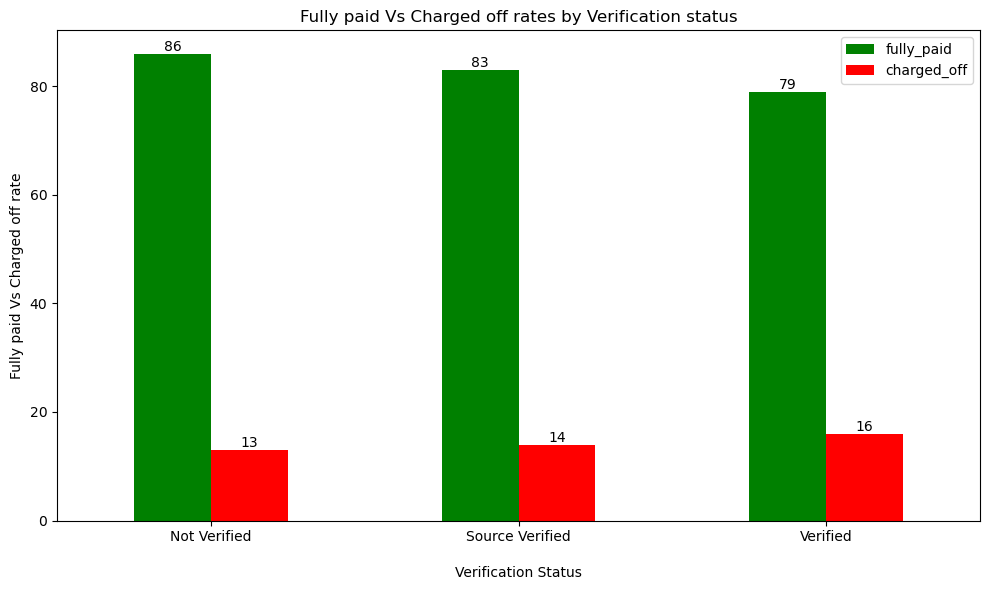

In [139]:
# charge_off and fully_paid rates by verification status
verification_df = lending_df[['verification_status']]
verification_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
verification_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = verification_df.groupby(['verification_status'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()


# plot
ax=charge_paid_rt.plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
   ax.bar_label(container)
plt.xlabel('\nVerification Status')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Verification status')
plt.xticks(charge_paid_rt.index, charge_paid_rt['verification_status'], rotation=0)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by verification status
1) Verification status tells us if the income of the borrower is verified either by the lending club or if the income source was verified or not verified at all.  

2) As expected the default rate is lower when the income is not verified. The highest default rate is when the income of the borrower is verified.  

3) There is however not a significant impact on the default rate as evident from the visualization. The overall data in the dataset also has a loan default rate of 14 percent which is about similar for all 3 verification statuses indicating that more or less there is no impact on the default rate from the verification status.

Interestingly, even if there is no major impact on income verification, the trend is the opposite of what is expected. When the income source is verified the default rate seems to have gone up. Something to be looked at.

#### Significant Indicator :  <font color='red'>No</font>

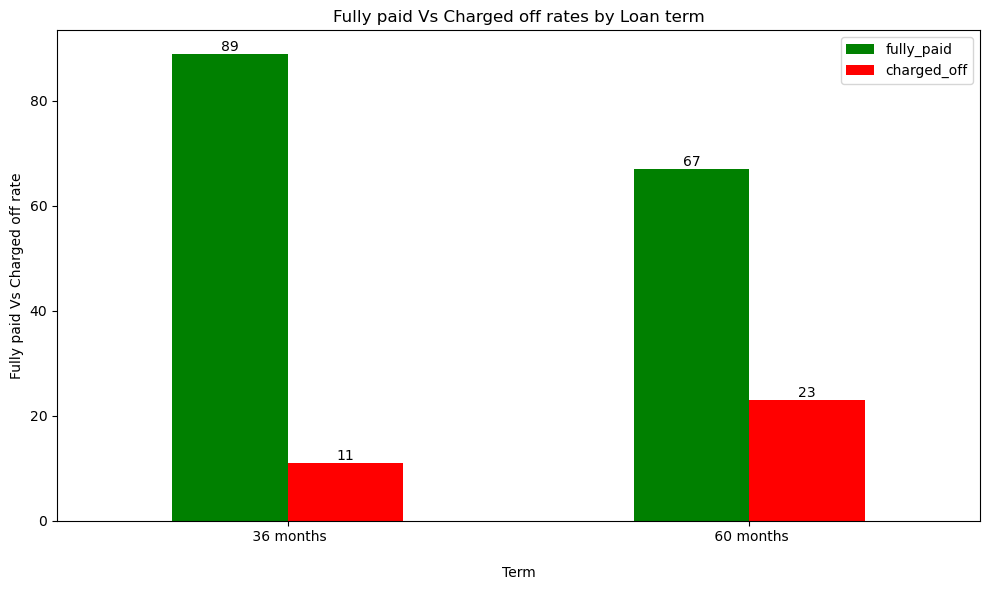

In [140]:
# charge_off and fully_paid rates by loan term
term_df = lending_df[['term']]
term_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
term_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = term_df.groupby(['term'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt.plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nTerm')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Loan term')
plt.xticks(charge_paid_rt.index, charge_paid_rt['term'], rotation=0)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by loan term
1) There are only two loan terms in the dataset, 36 months and 60 months.  
2) Loans with a 60-month term have a double default rate than that of a 36-month loan term. This could be due to the amount borrowed being high. The impact of the combination of term and amount can be checked further. For this, we may have to create a loan bucket to limit the number of loan amounts.

This could be due to the amount borrowed being high for the longer tenure. The impact of the combination of term and amount can be checked further.

#### Significant Indicator :  <font color='green'>Yes</font>

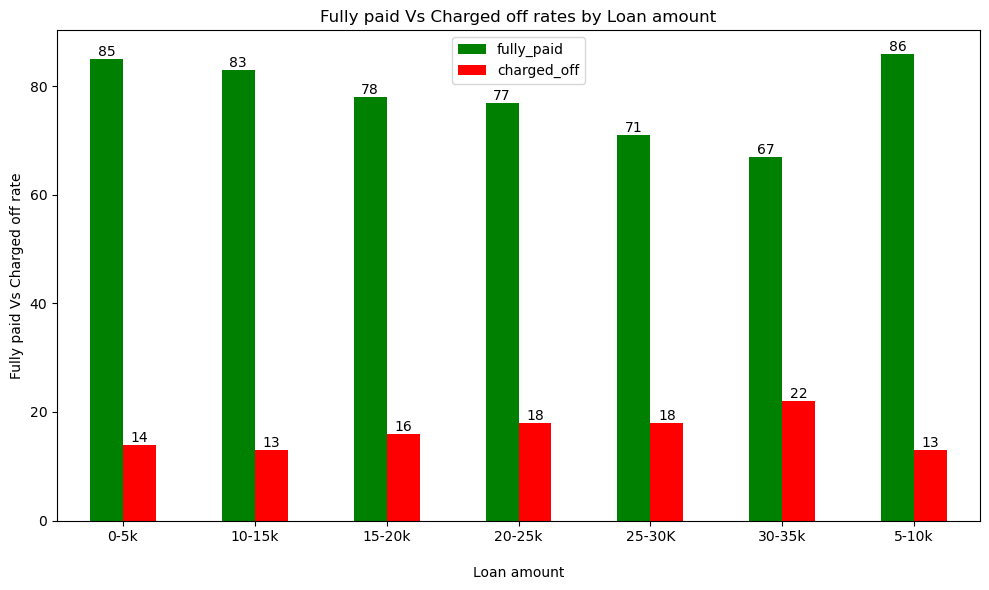

In [141]:
# charge_off and fully_paid rates by loan amount
amt_df=pd.DataFrame()
amt_df['amt_bckt'] = lending_df['loan_amnt'].apply(lambda x: '0-5k' if x <= 5000 else
                                                 '5-10k' if x > 5000 and x <= 10000 else
                                                 '10-15k' if x > 10000 and x <= 15000 else 
                                                 '15-20k' if x > 15000 and x <= 20000 else
                                                 '20-25k' if x > 20000 and x <= 25000 else
                                                 '25-30K' if x > 25000 and x <= 30000 else
                                                 '30-35k')
amt_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
amt_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = amt_df.groupby(['amt_bckt'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt.plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nLoan amount')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Loan amount')
plt.xticks(charge_paid_rt.index, charge_paid_rt['amt_bckt'], rotation=0)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by loan amount
1) The loan amount between 5k and 10k has the lowest default rate
2) As the loan amount increases,  default rates also increase.


#### Significant Indicator :  <font color='green'>Yes</font>

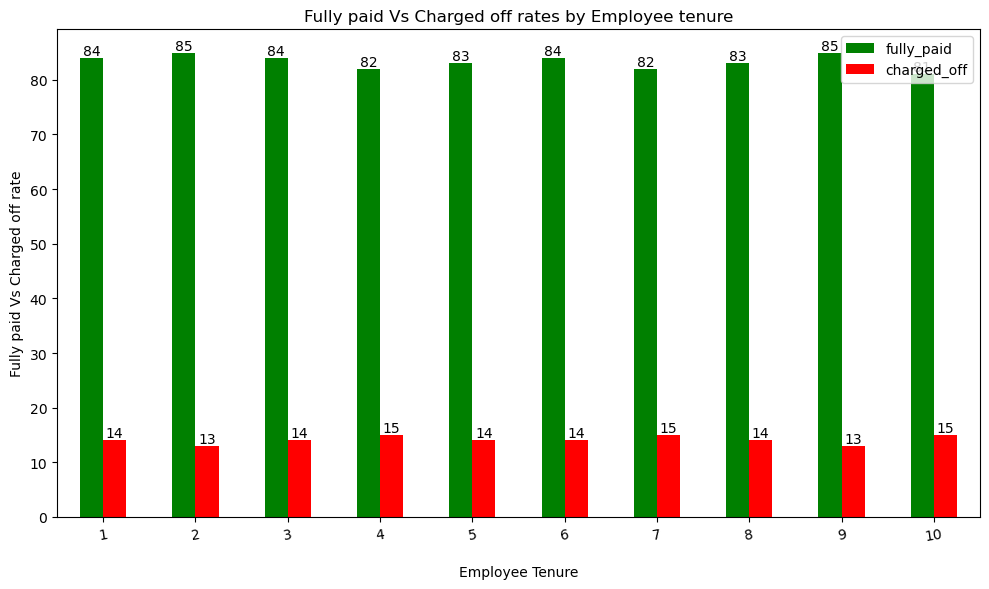

In [142]:
# charge_off and fully_paid rates by employee length
emp_len_df = lending_df[['emp_length']]
emp_len_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
emp_len_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = emp_len_df.groupby(['emp_length'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt[['fully_paid','charged_off']].plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nEmployee Tenure')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Employee tenure')
plt.xticks(charge_paid_rt.index, charge_paid_rt['emp_length'], rotation=9)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by Employee tenure
1) There is no significant impact of Employee tenure (how long the borrower has been working) on loan default rates.  
2) The default rate of all tenures hovers around 14 percent which is the overall loan default rate of the dataset concluding no impact.

There doesn't seem to be any impact of the employee tenure on loan repayment

#### Significant Indicator :  <font color='red'>No</font>

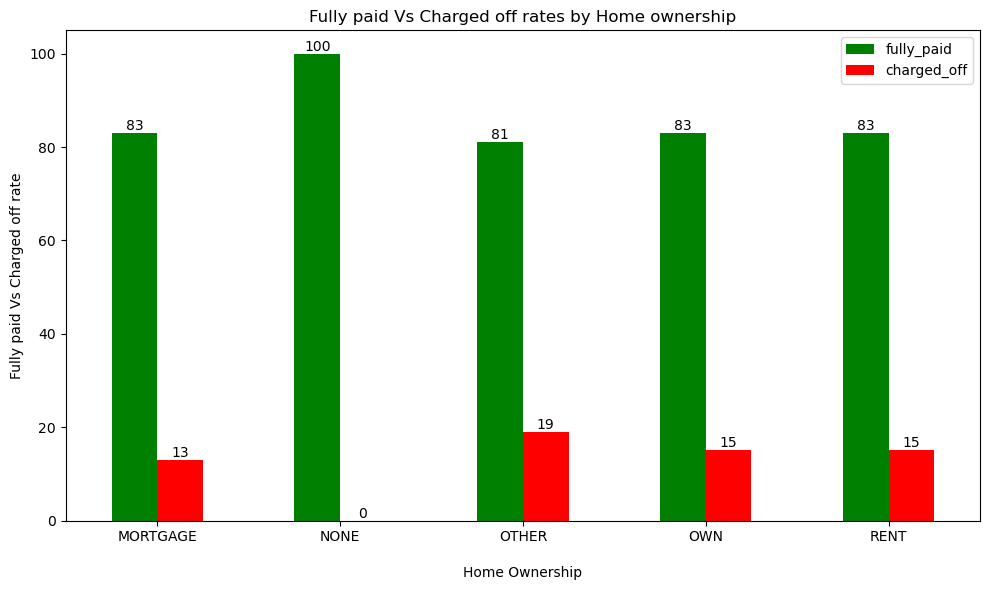

In [143]:
# charge_off and fully_paid rates by employee home ownership
ho_df = lending_df[['home_ownership']]
ho_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
ho_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = ho_df.groupby(['home_ownership'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt.plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nHome Ownership')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Home ownership')
plt.xticks(charge_paid_rt.index, charge_paid_rt['home_ownership'], rotation=0)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by Homeownership
1) There is no significant impact of Homeownership on loan default rates.   
2) The default rates among homeowners, homes on mortgage, or rented borrowers hover around the same rates.  
3) Borrowers with undisclosed/unknown home ownership status have a much higher default rate. about 18 percent.
4) There is a category 'NONE', we should not consider it because it has only 3 values, and all values are fully paid.
5) Lenders should be collecting this information to minimize risk

Borrowers with undisclosed home ownership status tend to default payments higher than a known home ownership status. So Lending club should keep an eye on why home ownership is not disclosed and treat such cases as higher-risk

#### Significant Indicator :  <font color='red'>No</font>

In [157]:
lending_df['home_ownership'].value_counts()

home_ownership
RENT        18785
MORTGAGE    17400
OWN          3013
OTHER          97
NONE            3
Name: count, dtype: int64

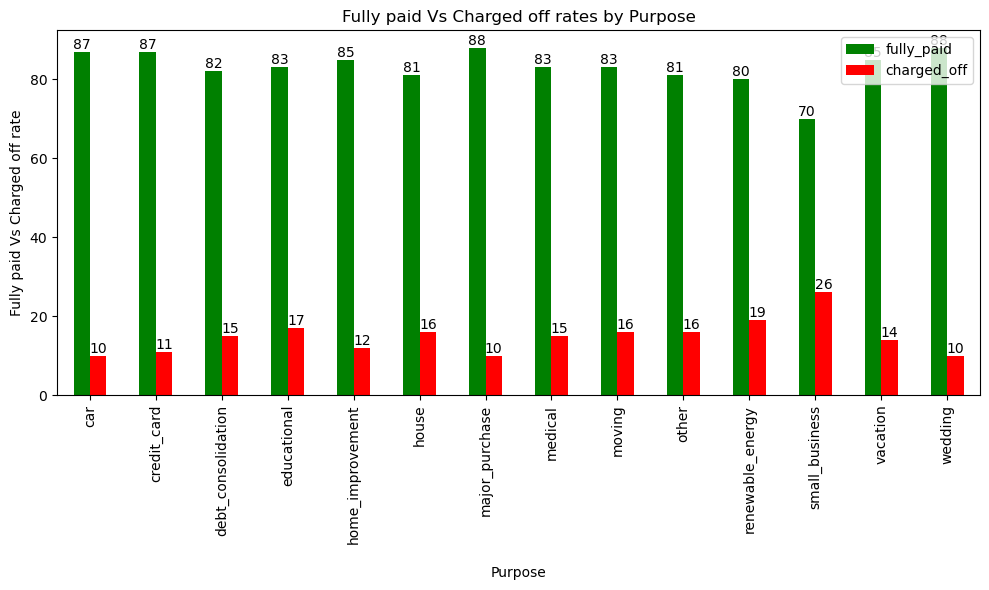

In [68]:
# charge_off and fully_paid rates by employee purpose
prp_df = lending_df[['purpose']]
prp_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
prp_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = prp_df.groupby(['purpose'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt.plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nPurpose')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Purpose')
plt.xticks(charge_paid_rt.index, charge_paid_rt['purpose'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by Loan purpose

1) Highest default rate of about 25% is for loans acquired for small businesses.
2) Mostly everything else stays within 15% or lower.
3) Loans availed for educational purposes and renewable energy also go slightly above 15%
  
  
Small business loans are the riskiest by far with over 25% default rate

#### Significant Indicator :  <font color='green'>Yes</font>

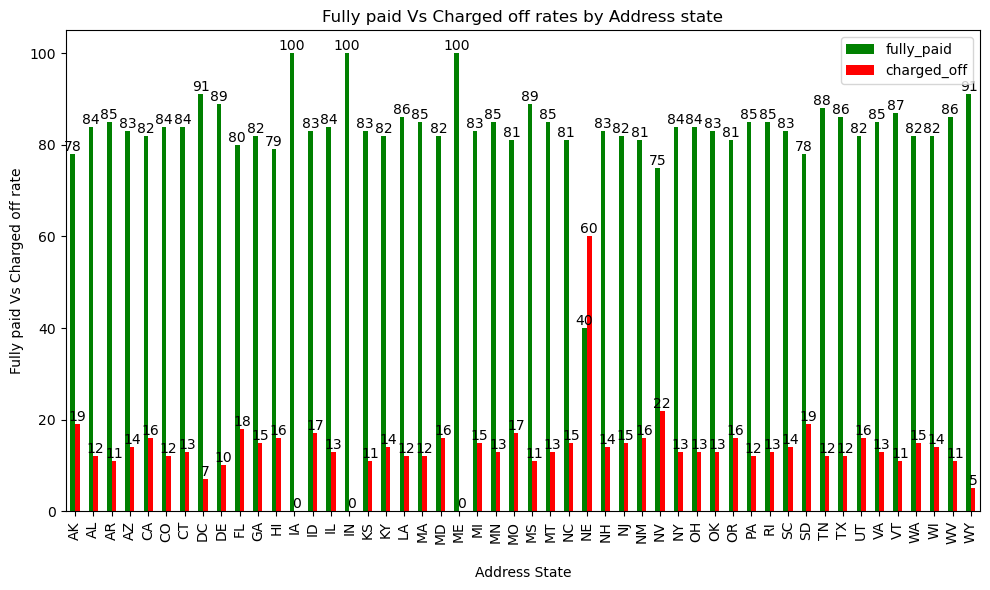

In [144]:
# charge_off and fully_paid rates by address state
state_df = lending_df[['addr_state']]
state_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
state_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = state_df.groupby(['addr_state'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt.plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nAddress State')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Address state')
plt.xticks(charge_paid_rt.index, charge_paid_rt['addr_state'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by Address

1) The default rate spread across address states is uneven.  
2) The states IA, IN and ME has extremely few numbers and hence the 0 percent default need not be taken at face value.  
  
  
Loans from states 'NE'  have the highest default approx. 60 percent. Loans given to these states can be considered risky. The risk is reasonably high for loans given to people from states NE, NV, SD, and AK.

#### Significant Indicator :  <font color='green'>Yes</font>

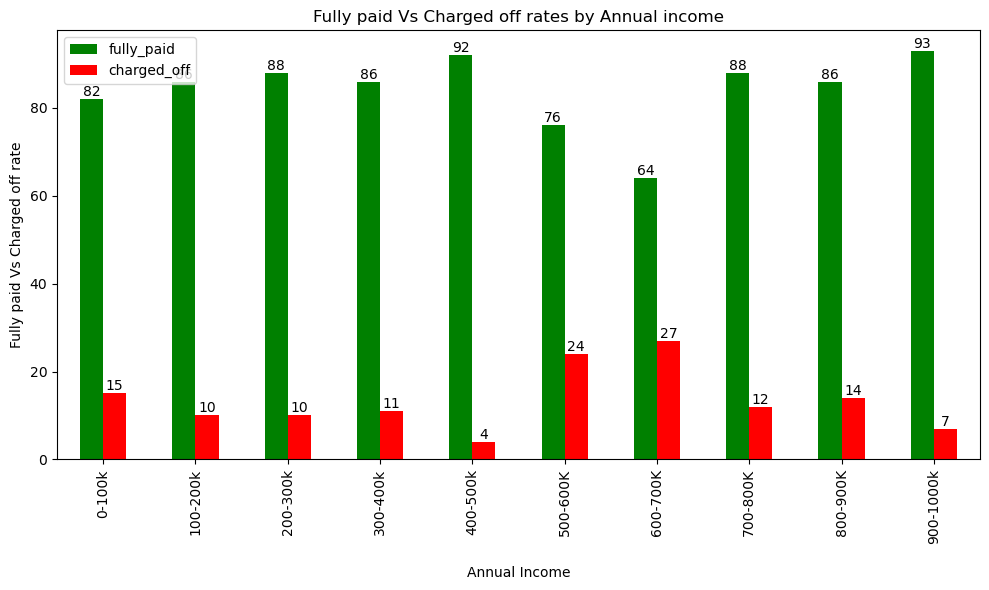

In [145]:
# charge_off and fully_paid rates by annual income
inc_df=pd.DataFrame()
inc_df['inc_bckt'] = lending_df['annual_inc'].apply(lambda x: '0-100k' if x <= 100000 else
                                                 '100-200k' if x > 100000 and x <= 200000 else
                                                 '200-300k' if x > 200000 and x <= 300000 else 
                                                 '300-400k' if x > 300000 and x <= 400000 else
                                                 '400-500k' if x > 400000 and x <= 500000 else
                                                 '500-600K' if x > 500000 and x <= 600000 else
                                                 '600-700K' if x > 600000 and x <= 700000 else
                                                  '700-800K' if x > 700000 and x <= 800000 else
                                                   '800-900K' if x > 800000 and x <= 900000 else
                                                   '900-1000k')
inc_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
inc_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = inc_df.groupby(['inc_bckt'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt.plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nAnnual Income')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Annual income')
plt.xticks(charge_paid_rt.index, charge_paid_rt['inc_bckt'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by income
1) Highest default rate is for people with income levels between 500-600k and 600-700k at close to 25%.  
2) The lowest default rate is for people with income levels between 400-500k.
  
  
An interesting insight is that income levels of 600-700k tend to default at a higher rate than any other income level and at a higher 25%. 


#### Significant Indicator :  <font color='green'>Yes</font>

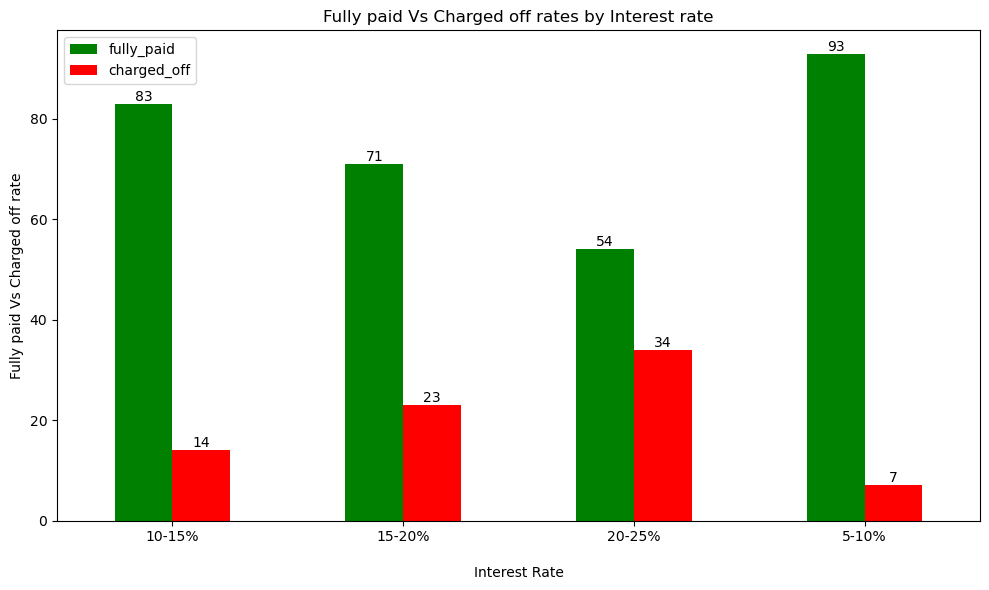

In [146]:
# charge_off and fully_paid rates by interest rate
int_df=pd.DataFrame()
int_df['int_bckt'] = lending_df['int_rate'].apply(lambda x: '5-10%' if x <= 10 else
                                                 '10-15%' if x > 10 and x <= 15 else
                                                 '15-20%' if x > 15 and x <= 20 else 
                                                  '20-25%')
int_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
int_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = int_df.groupby(['int_bckt'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt.plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nInterest Rate')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Interest rate')
plt.xticks(charge_paid_rt.index, charge_paid_rt['int_bckt'], rotation=0)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by interest rates
Straight forward insight. The higher the interest rate, the higher the loan default rate. A higher interest rate of 20-25% has a very high risk. The loans given at this rate have more than a 30% default rate. So the loans are given at 15 to 20 percent interest rate which has more than 20% default rate.

#### Significant Indicator :  <font color='green'>Yes</font>

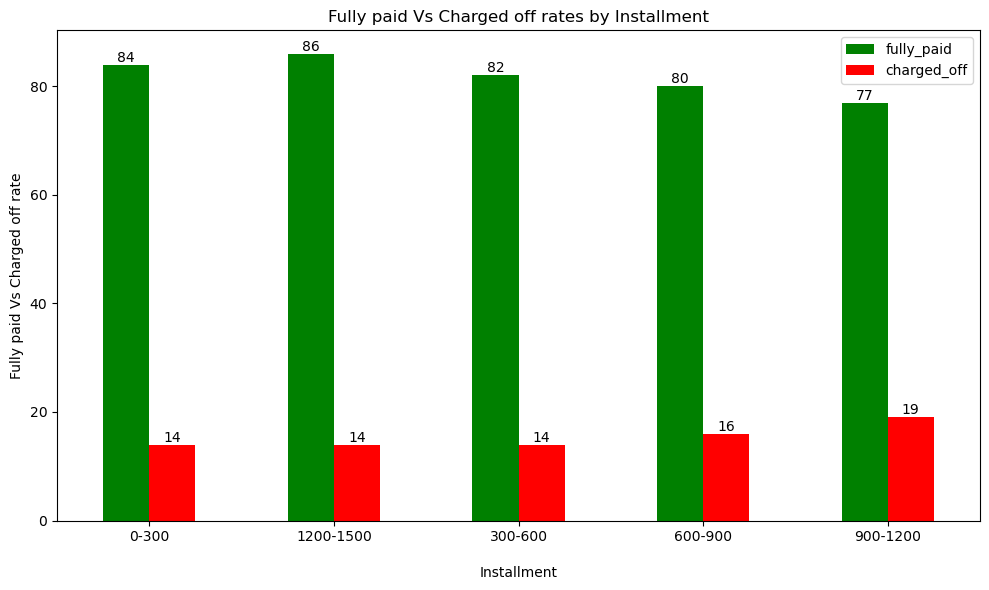

In [93]:
# charge_off and fully_paid rates by installment
install_df=pd.DataFrame()
install_df['install_bckt'] = lending_df['installment'].apply(lambda x: '0-300' if x <= 300 else
                                                 '300-600' if x > 300 and x <= 600 else
                                                 '600-900' if x > 600 and x <= 900 else
                                                 '900-1200' if x > 900 and x <= 1200 else
                                                  '1200-1500')
install_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
install_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = install_df.groupby(['install_bckt'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt.plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nInstallment')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Installment')
plt.xticks(charge_paid_rt.index, charge_paid_rt['install_bckt'], rotation=0)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by interest rates
The monthly installment amount doesn't seem to have a significant impact on loan repayment. The default rate remains more or less the same for installment amounts. The highest deviation is for installments between 900 and 1200, which is close to 17%.

#### Significant Indicator :  <font color='red'>No</font>

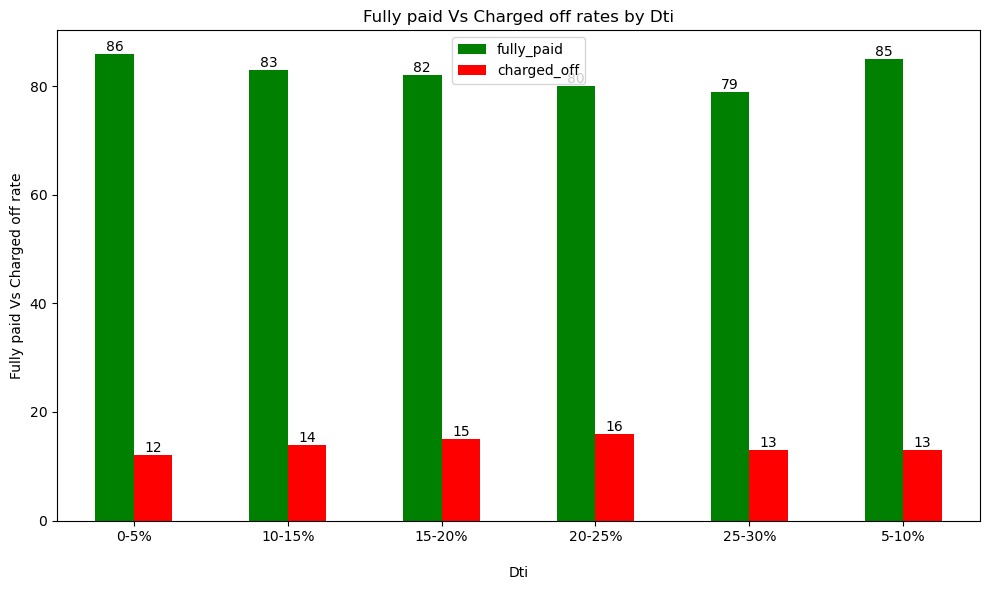

In [95]:
# charge_off and fully_paid rates by dti
dti_df=pd.DataFrame()
dti_df['dti_bckt'] = lending_df['dti'].apply(lambda x: '0-5%' if x <= 5 else
                                                 '5-10%' if x > 5 and x <= 10 else
                                                 '10-15%' if x > 10 and x <= 15 else
                                                 '15-20%' if x > 15 and x <= 20 else
                                                  '20-25%' if x > 20 and x <= 25 else
                                                  '25-30%')
dti_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
dti_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = dti_df.groupby(['dti_bckt'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt.plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nDti')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Dti')
plt.xticks(charge_paid_rt.index, charge_paid_rt['dti_bckt'], rotation=0)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by dti
DTI doesn't seem to have a huge impact on loan repayment the default rates between various dti ratios seem to be between 12%-15% which is not a significant impact


#### Significant Indicator :  <font color='red'>No</font>

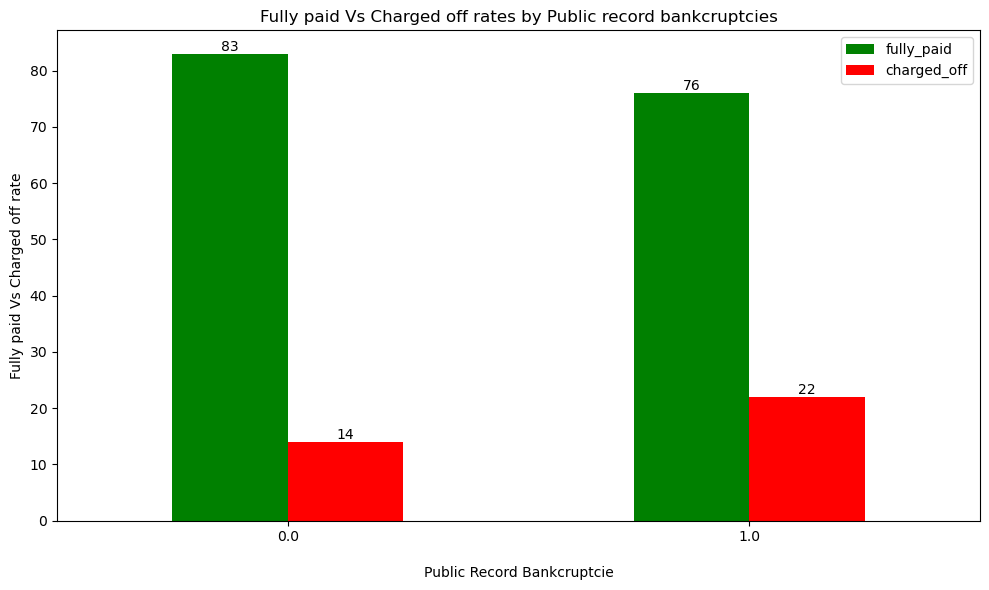

In [147]:
# charge_off and fully_paid rates by public record bankruptcies
prb_df = lending_df[['pub_rec_bankruptcies']]
prb_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
prb_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = prb_df.groupby(['pub_rec_bankruptcies'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt[['fully_paid','charged_off']].plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nPublic Record Bankcruptcie')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Public record bankcruptcies')
plt.xticks(charge_paid_rt.index, charge_paid_rt['pub_rec_bankruptcies'], rotation=0)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by bankruptcies
Bankruptcy records have a significant impact on loan repayment. A person who has filed 1 bankruptcy has defaulted more than 20% percent. The higher the bankruptcy record, the higher the risk.

#### Significant Indicator :  <font color='green'>Yes</font>

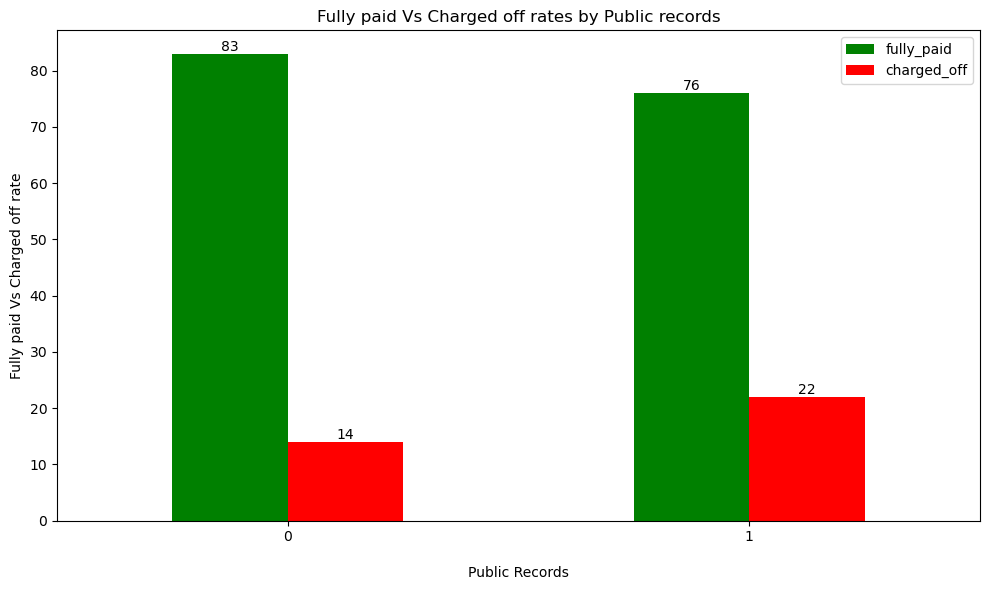

In [148]:
# charge_off and fully_paid rates by public records
pr_df = lending_df[['pub_rec']]
pr_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
pr_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = pr_df.groupby(['pub_rec'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt[['fully_paid','charged_off']].plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nPublic Records')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Public records')
plt.xticks(charge_paid_rt.index, charge_paid_rt['pub_rec'], rotation=0)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by public derogatory records
Public derogatory records do seem to have an impact on loan repayment, but there is no real trend as such. A single derogatory record does have a risk with more than a 20% default rate and 2 records show close to a 20% default rate.
  
  
Lending to applicants with 1 public derogatory record against them is a relatively higher risk.

#### Significant Indicator :  <font color='green'>Yes</font>

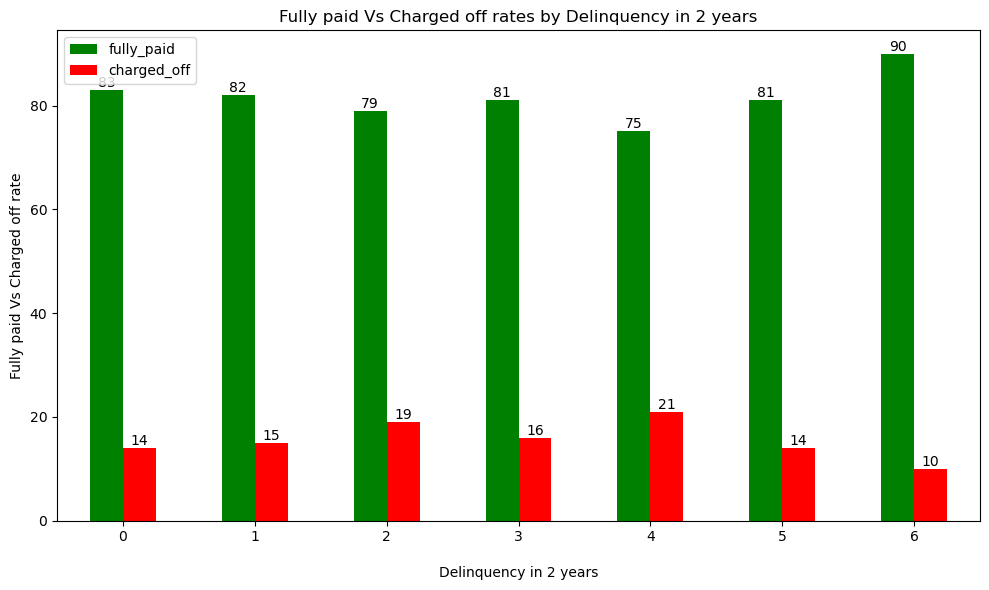

In [149]:
# charge_off and fully_paid rates by delinquency in 2 years
d2yr_df = lending_df[['delinq_2yrs']]
d2yr_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
d2yr_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = d2yr_df.groupby(['delinq_2yrs'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt[['fully_paid','charged_off']].plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nDelinquency in 2 years')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Delinquency in 2 years')
plt.xticks(charge_paid_rt.index, charge_paid_rt['delinq_2yrs'], rotation=0)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by delinquency record in the last 2 years

There is no significant pattern. There is barely any applicant with more than 5 delinquency records and hence the default rates cannot be taken at face value.

In general applicants with 2 and 4 (considering up to 5 delinquency records as there is not enough data post that) have a higher risk of about 20% default rate among them

#### Significant Indicator :  <font color='red'>No</font>

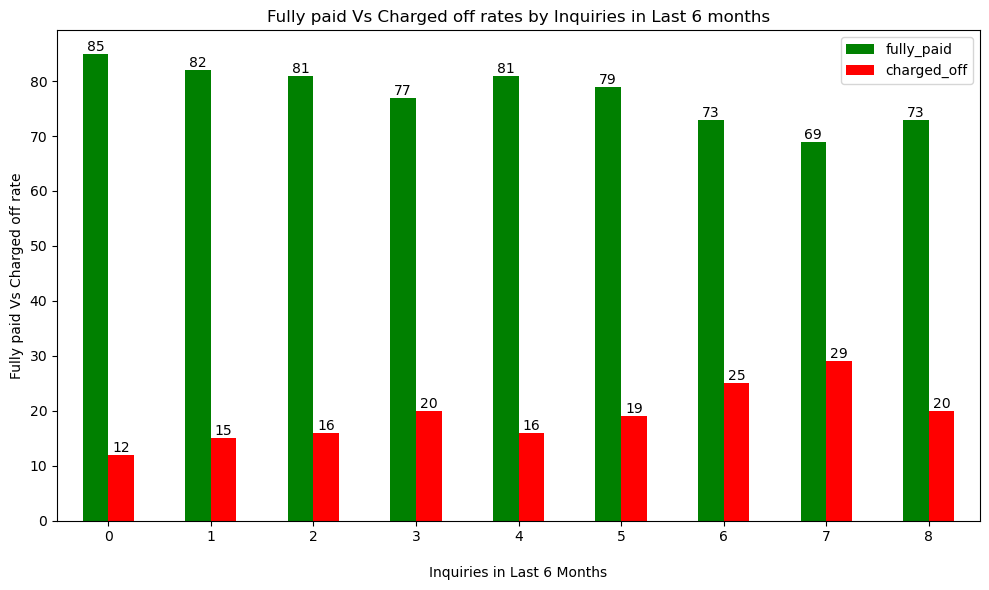

In [151]:
# charge_off and fully_paid rates by inquiries in last 6 months
inq_df = lending_df[['inq_last_6mths']]
inq_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
inq_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = inq_df.groupby(['inq_last_6mths'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt[['fully_paid','charged_off']].plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nInquiries in Last 6 Months')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Inquiries in Last 6 months')
plt.xticks(charge_paid_rt.index, charge_paid_rt['inq_last_6mths'], rotation=0)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by credit inquiries

There is no significant pattern. However, applicants with 6 and 7 inquiries in the past 6 months pose a higher risk of default over 25%

#### Significant Indicator :  <font color='green'>Yes</font>

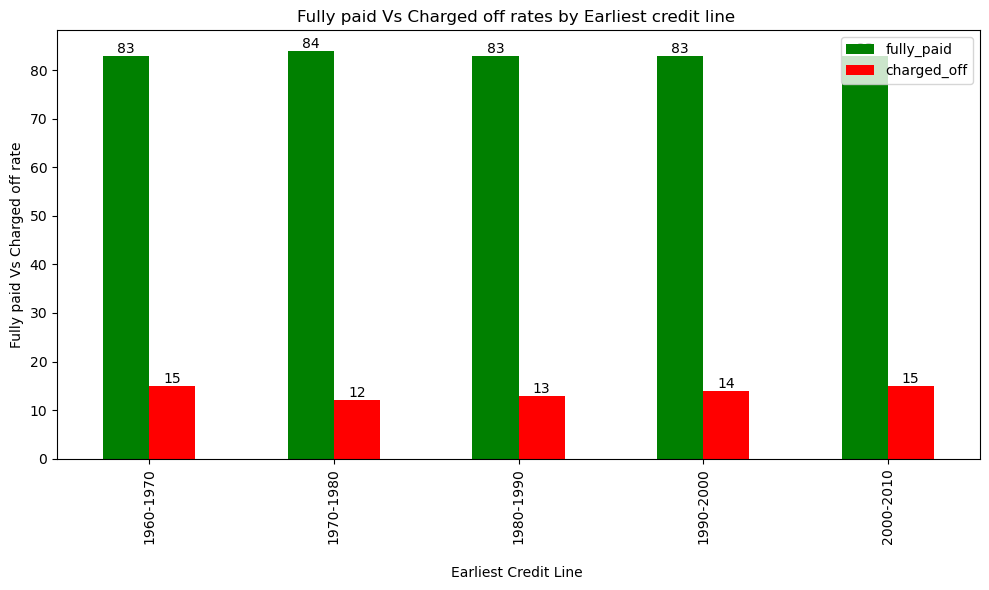

In [152]:
# charge_off and fully_paid rates by earliest credit line
ecl_df=pd.DataFrame()
ecl_df['ecl_bckt'] = lending_df['earliest_cr_year'].apply(lambda x: '1940-1950' if x <= 1950 else
                                                 '1950-1960' if x > 1950 and x <= 1960 else
                                                 '1960-1970' if x >1960 and x <= 1970 else
                                                 '1970-1980' if x > 1970 and x <= 1980 else
                                                  '1980-1990' if x > 1980 and x <= 1990 else
                                                   '1990-2000' if x > 1990 and x <= 2000 else       
                                                  '2000-2010')
ecl_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
ecl_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = ecl_df.groupby(['ecl_bckt'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt.plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nEarliest Credit Line ')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Earliest credit line ')
plt.xticks(charge_paid_rt.index, charge_paid_rt['ecl_bckt'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by earliest credit year

There is no significant pattern. They all stay within the overall average of about 14% indicating no significant impact

#### Significant Indicator :  <font color='red'>No</font>

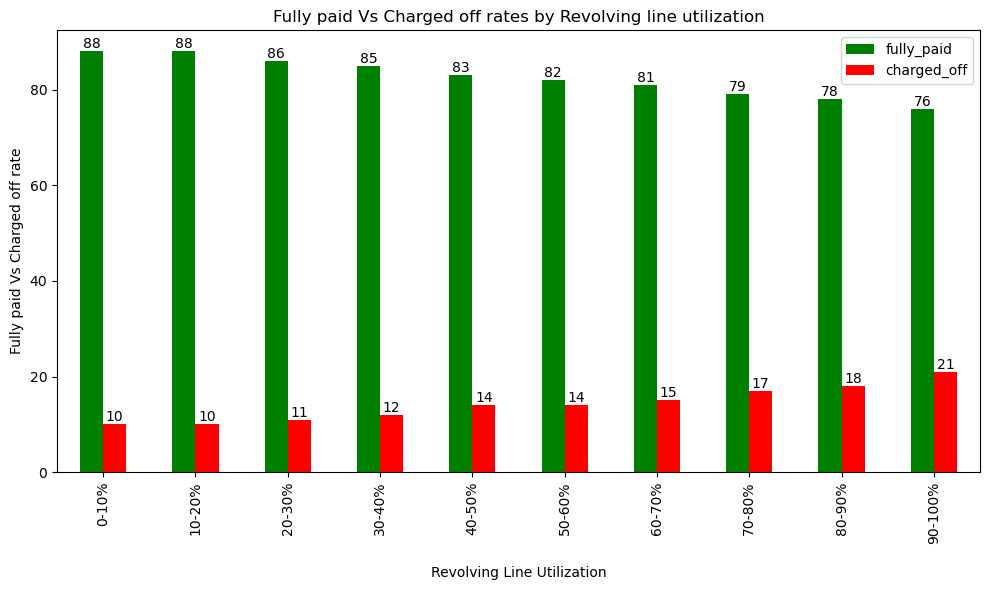

In [153]:
# charge_off and fully_paid rates by Revolving line utilization
revolu_df=pd.DataFrame()
revolu_df['revolu_bckt'] =  lending_df['revol_util'].apply(lambda x: '0-10%' if x <= 10 else
                                                 '10-20%' if x > 10 and x <= 20 else
                                                 '20-30%' if x >20 and x <= 30 else
                                                 '30-40%' if x > 30 and x <= 40 else
                                                  '40-50%' if x > 40 and x <= 50 else
                                                   '50-60%' if x > 50 and x <= 60 else    
                                                    '60-70%' if x > 60 and x <= 70 else
                                                  '70-80%' if x > 70 and x <= 80 else
                                                   '80-90%' if x > 80 and x <= 90 else         
                                                  '90-100%')
revolu_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
revolu_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = revolu_df.groupby(['revolu_bckt'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt.plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nRevolving Line Utilization')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Revolving line utilization')
plt.xticks(charge_paid_rt.index, charge_paid_rt['revolu_bckt'], rotation=90)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by revolving credit utilization

There is a definite pattern here. The more the revolving credit utilization of the applicant the higher the risk of default. The highest default rate is close to 20% for a revolving credit utilization of 90 to 100 percent.

#### Significant Indicator :  <font color='green'>Yes</font>

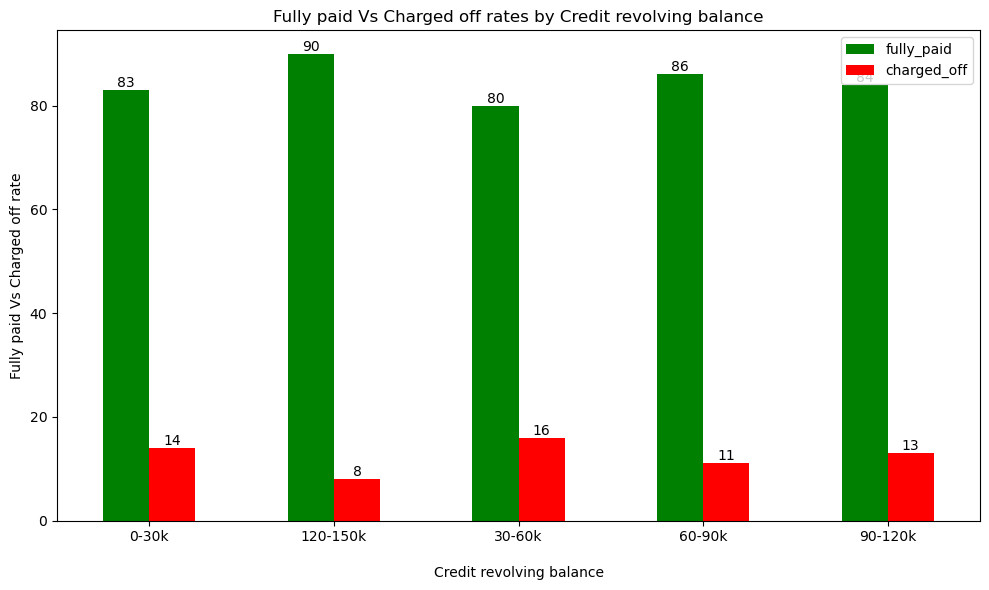

In [97]:
# charge_off and fully_paid rates by credit revolving balance
revolb_df=pd.DataFrame()
revolb_df['revolb_bckt'] = lending_df['revol_bal'].apply(lambda x: '0-30k' if x <= 30000 else                                                
                                                 '30-60k' if x > 30000 and x <= 60000 else
                                                  '60-90k' if x > 60000 and x <= 90000 else
                                                   '90-120k' if x > 90000 and x <= 120000 else
                                                   '120-150k')
revolb_df['fully_paid']= np.where(lending_df['loan_status'] =='Fully Paid', 1,0 )
revolb_df['charged_off']= np.where(lending_df['loan_status'] =='Charged Off', 1,0 )

# get charge_off and fully_paid rates
charge_paid_rt = revolb_df.groupby(['revolb_bckt'])[['fully_paid','charged_off']].mean().reset_index()
charge_paid_rt[['fully_paid','charged_off']]=(charge_paid_rt[['fully_paid','charged_off']]*100).round()

# plot
ax=charge_paid_rt.plot(kind='bar',figsize=(10, 6),  color=['green', 'red'])
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('\nCredit revolving balance')
plt.ylabel('Fully paid Vs Charged off rate')
plt.title('Fully paid Vs Charged off rates by Credit revolving balance')
plt.xticks(charge_paid_rt.index, charge_paid_rt['revolb_bckt'], rotation=0)
plt.tight_layout()
plt.show()

### Insights - Loan default rates by revolving credit balance

There is no high risk here. However, an applicant with a revolving balance of 120-150k seems to be very low risk with a default rate of less than 8%

#### Significant Indicator :  <font color='red'>No</font>

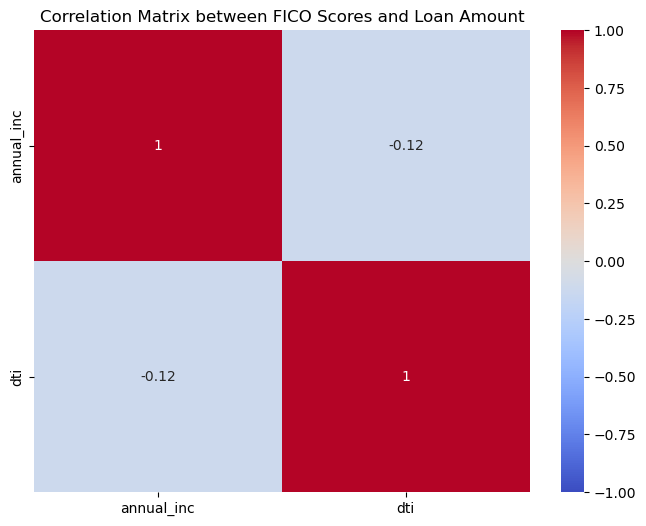

In [98]:
# correlation between annual income and dti
ai_dti_df = lending_df[['annual_inc', 'dti']]

# create correlation matrix 
corr_matrix = ai_dti_df.corr()

# visualize
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between FICO Scores and Loan Amount')
plt.show()

### Insights - correlation between annual income and debt-to-income ratio

There doesn't seem to be any correlation between the two. The negative correlation of 14% is not very significant or strong

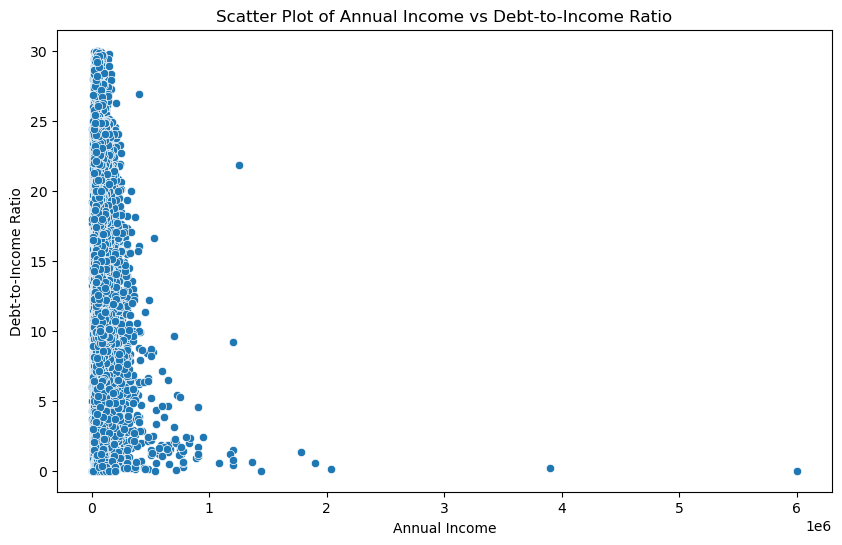

In [99]:
# scatter plot betweenincome to debt ratio and annual income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='dti', data=ai_dti_df)
plt.title('Scatter Plot of Annual Income vs Debt-to-Income Ratio')
plt.xlabel('Annual Income')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

### Insights - correlation between annual income and debt-to-income ratio

In the scatter plot between annual income and dti, we can see a pattern. Only for a very high income of 400k or more, the dti is very low. 

This in a way explains why the 400-500k income range has a very low charged-off / default rate which we saw in the previous analysis.

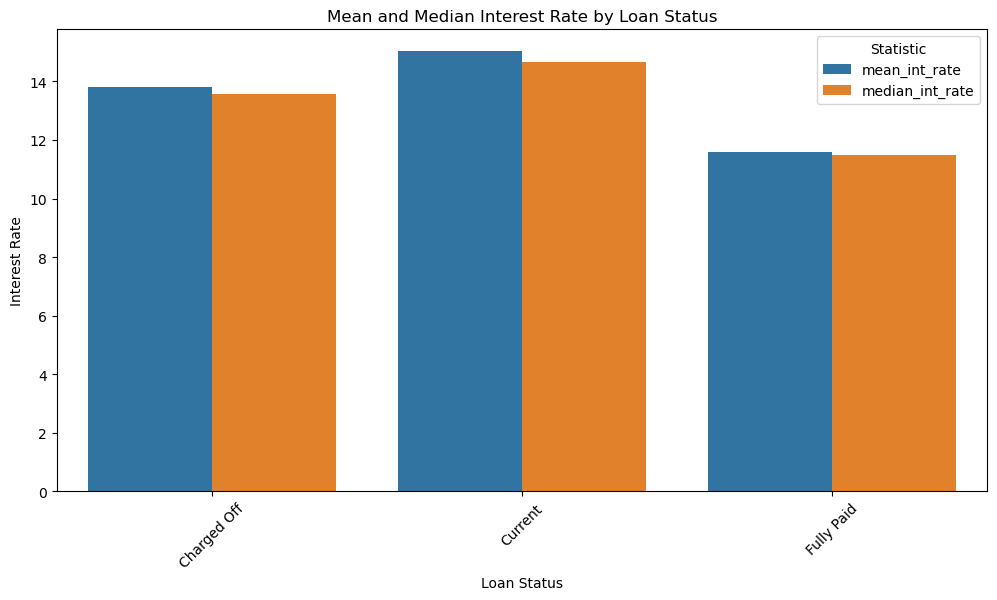

In [154]:
# compare loan status with other numerical features
loan_with_num_ft = lending_df[['loan_status', 'int_rate', 'installment', 'dti']]

# Create a pivot table
pivot_table = loan_with_num_ft.pivot_table(
    values='int_rate',
    index='loan_status',
    aggfunc=['mean', 'median']
).reset_index()

# Visualizing the pivot table
pivot_table.columns = ['loan_status', 'mean_int_rate', 'median_int_rate']
pivot_table_melted = pivot_table.melt(id_vars=['loan_status'], value_vars=['mean_int_rate', 'median_int_rate'])

plt.figure(figsize=(12, 6))
sns.barplot(data=pivot_table_melted, x='loan_status', y='value', hue='variable')
plt.title('Mean and Median Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)
plt.legend(title='Statistic')
plt.show()

### Insights - relationship between interest rate and loan status
The interesting insight here is that among fully paid loans the interest rate is the lowest at less than 12% (both mean and median).

There is about a 2% increase in the interest rate on charged-off loans.

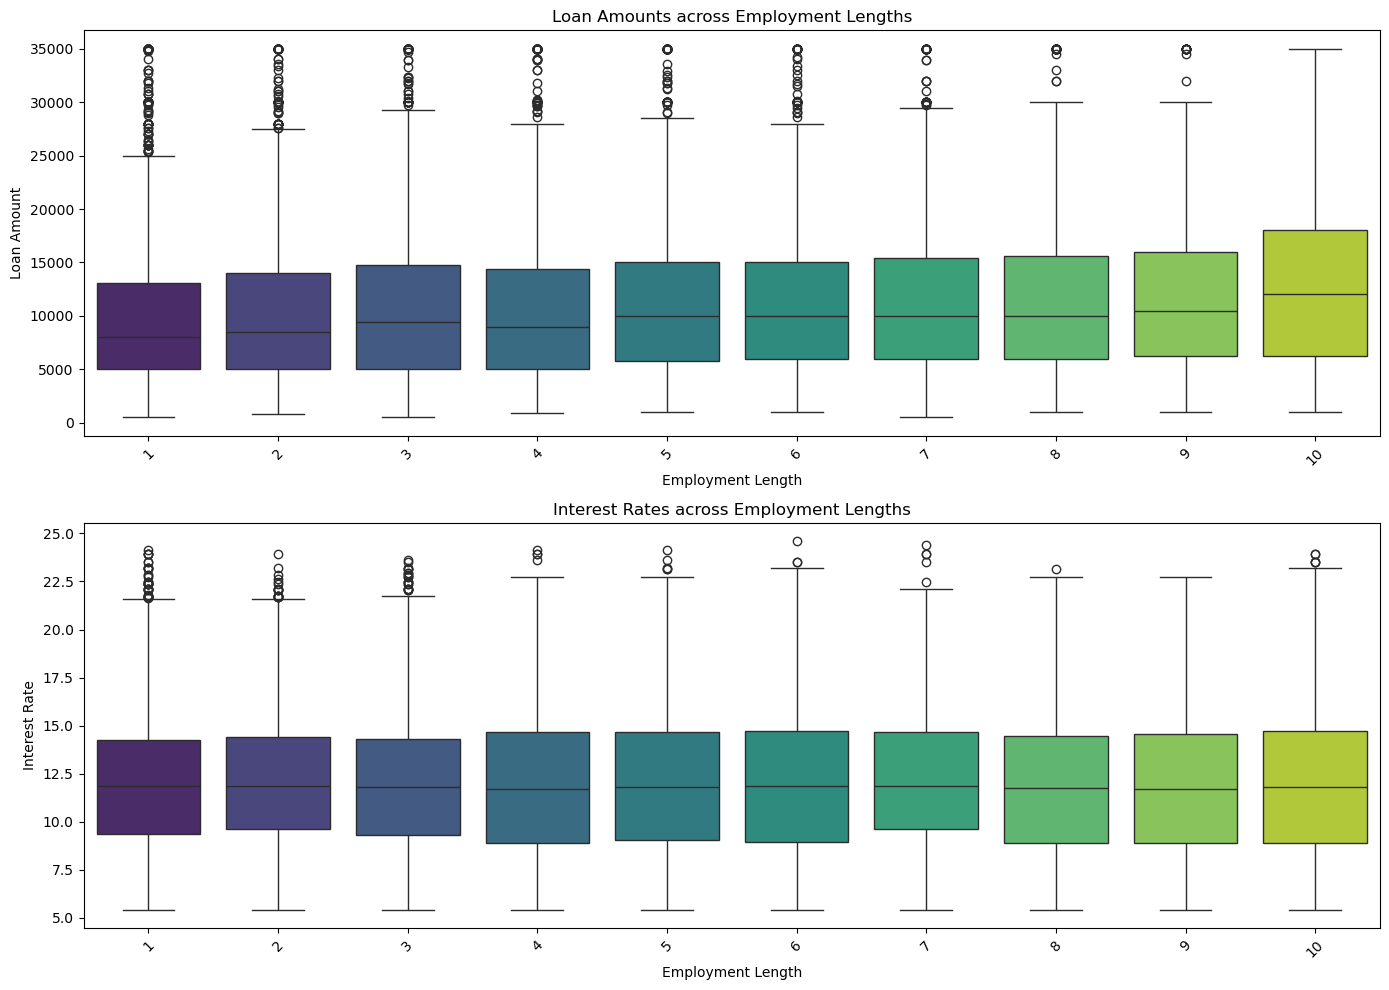

In [155]:
# Bivariate Analysis: Box plots
plt.figure(figsize=(14, 10))

# Box plot for Loan Amounts across Employment Lengths
plt.subplot(2, 1, 1)
sns.boxplot(data=lending_df, x='emp_length', y='loan_amnt', palette='viridis')
plt.title('Loan Amounts across Employment Lengths')
plt.xlabel('Employment Length')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)

# Box plot for Interest Rates across Employment Lengths
plt.subplot(2, 1, 2)
sns.boxplot(data=lending_df, x='emp_length', y='int_rate', palette='viridis')
plt.title('Interest Rates across Employment Lengths')
plt.xlabel('Employment Length')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Insights - relationship of employee length with interest rates and loan amounts
1) Employee tenure has a very weak pattern of applying for higher amounts (median value considered) with higher tenure/experience. However, there is a clear higher spike on the 75th percentile values. The insight is that with more experience and higher salaries, there would be higher loan eligibility.  
  
  
2) Employee tenure doesn't seem to have a significant impact on the interest rates. The median interest rate and the 75th percentile values remain more or less similar across employee tenure. However, the 25th percentile has a trend of getting lower as the tenure increases. This could be attributed to the higher salaries, meaning higher repayment capacities which keeps the risks low for the lending club and hence sanctions the loan at a lower interest rate

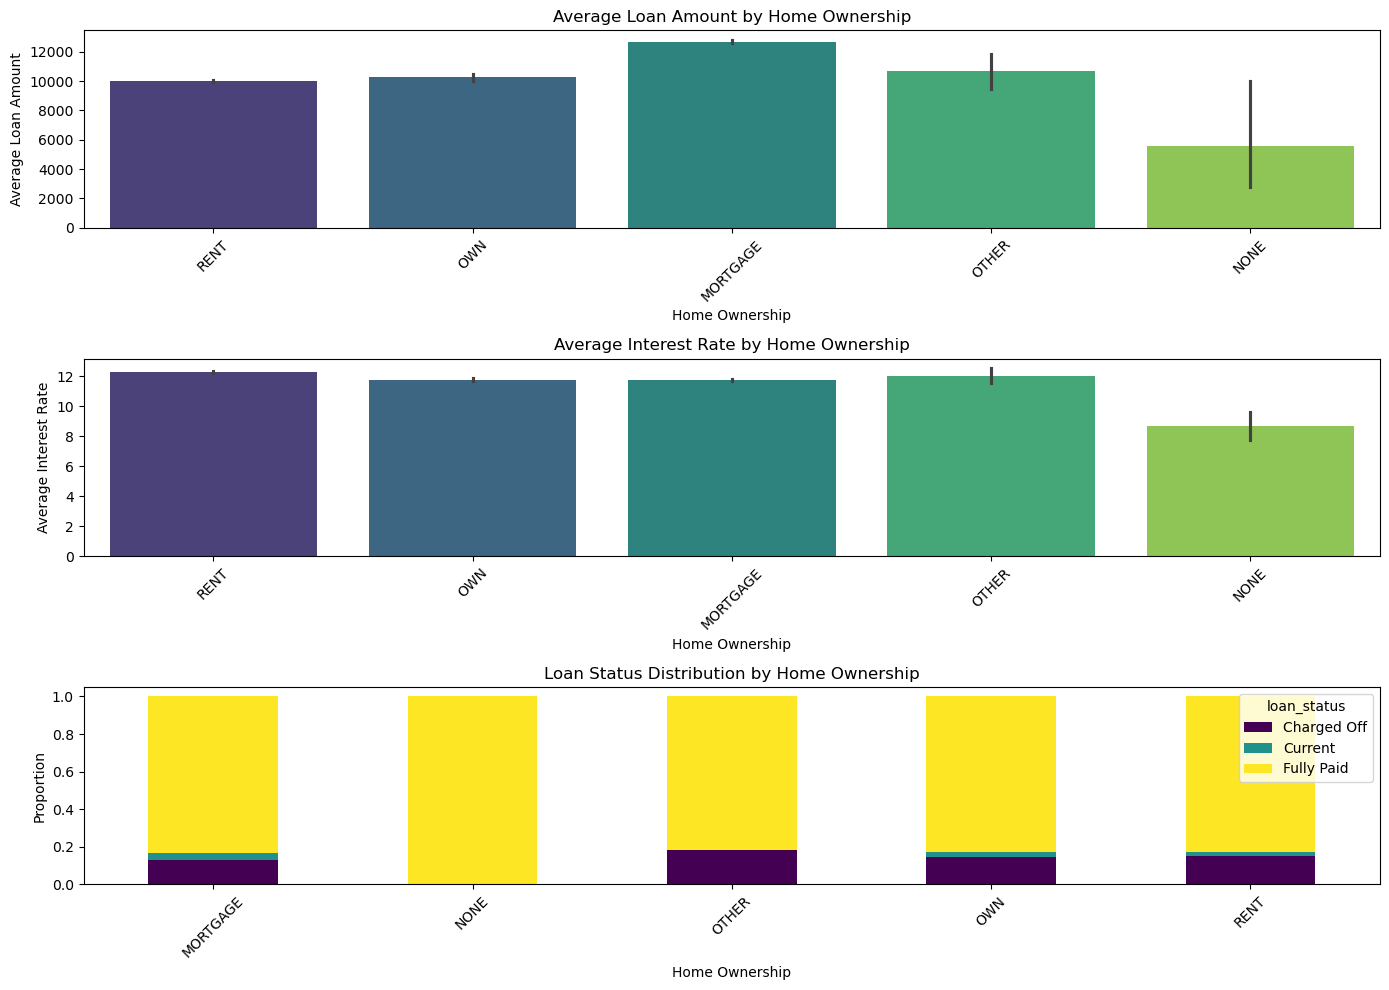

In [156]:
#Impact of home ownership on loan_amnt, int_rate, and loan_status
home_df = lending_df[['home_ownership', 'loan_amnt', 'int_rate', 'loan_status']]

# Visualizing Group Analysis
plt.figure(figsize=(14, 10))

# Loan Amount Analysis
plt.subplot(3, 1, 1)
sns.barplot(data=home_df, x='home_ownership', y='loan_amnt', palette='viridis')
plt.title('Average Loan Amount by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)

# Interest Rate Analysis
plt.subplot(3, 1, 2)
sns.barplot(data=home_df, x='home_ownership', y='int_rate', palette='viridis')
plt.title('Average Interest Rate by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Average Interest Rate')
plt.xticks(rotation=45)

# Loan Status Analysis
plt.subplot(3, 1, 3)
loan_status_counts = home_df.groupby('home_ownership')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
loan_status_counts.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
plt.title('Loan Status Distribution by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Insights - the impact of home ownership on  the average loan amount, average interest rate, and loan status
1) Homeownership doesn't have a huge impact on the loan amount sanctioned. Just the homeowners with mortgages on their loans have applied for a higher loan amount, indicating the need for more money.
2) The average interest rate doesn't change based on home ownership.  
3) Home ownership doesn't seem to impact the default rates from the visualization.

# After doing lots of analysis, we found some significant variables that can be used by the risk management team for making further decisions

### <font color='blue'> We found mentioned below variables significant </font>

##### <font color='green'> 1)  Grade and Sub Grade (grade and sub_grade) </font>
##### <font color='green'> 2) Loan Term  (term) </font>
##### <font color='green'> 3) Address State (addr_state) </font>
##### <font color='green'> 4) Purpose (purpose) </font>
##### <font color='green'> 5) Annual Income (annual_inc) </font>
##### <font color='green'> 6) Interest Rate (int_rate) </font>
##### <font color='green'> 7) Loan Amount (loan_amnt) </font>
##### <font color='green'> 8) Public Record bankruptcies (pub_rec_bankruptcies) </font>
##### <font color='green'> 9) Public Records (pub_rec) </font>
##### <font color='green'> 10) Inquiries in past 6 months (inq_last_6mths) </font>
##### <font color='green'> 11) Revolving line utilization rate (revol_uti)  </font>
